In [1]:
%matplotlib inline

import sqlite3
import datetime  
from collections import Counter
import nltk
import matplotlib 
import matplotlib.pyplot as plt
from nltk import FreqDist

In [2]:
#connecting to the database
db = sqlite3.connect("reprocessing_competitors.db") # creating connection to DB
cur = db.cursor()

I wanted to split up the Stryker and Sterile Med text so I created two seperate tables

In [3]:
stryker= cur.execute('''CREATE TABLE IF NOT EXISTS stryker AS
                        SELECT * FROM site_text
                        WHERE base_url="http://sustainability.stryker.com/"
                        GROUP BY dt, base_url, url, text''')
db.commit()

In [4]:
sterile=cur.execute('''CREATE TABLE IF NOT EXISTS sterile_med AS
                        SELECT * FROM site_text
                        WHERE base_url="https://www.jnjmedicaldevices.com/en-US/service/reprocessing"
                        GROUP BY dt, base_url, url, text''')
db.commit()

In [5]:
# grabbing all the Stryker raw text and putting it into a list
cur.execute('''SELECT distinct text FROM stryker''')
sraw_text=[]
for row in cur.fetchall() :
    sraw_text.append(row[0])


In [6]:
sw = nltk.corpus.stopwords.words("english")


In [7]:
#cleaning words
swords=[]

for text in sraw_text :
    text = [word.lower() for word in text.split()] #making all the words lowercase
    text = [word.strip() for word in text if word.isalpha()] # only alphabetic characters
    text = [word for word in text if word not in sw] # getting rid of nothing words like the, and ,a 
    swords.extend(text)
    

In [8]:
#Counting non-stopwords
scounter= Counter(swords)
stotal=len(scounter)
print(stotal)

2193


In [9]:
# Repeating above steps for sterile med
cur.execute('''SELECT distinct text FROM sterile_med''')
jraw_text=[]
for row in cur.fetchall() :
    jraw_text.append(row[0])


In [10]:
jwords=[]

for text in jraw_text :
    text = [word.lower() for word in text.split()]
    text = [word.strip() for word in text if word.isalpha()]
    text = [word for word in text if word not in sw]
    jwords.extend(text)
    

In [11]:
jcounter= Counter(jwords)
jtotal=len(jcounter)
print(jtotal)

3495


In [12]:
#getting 25 most used words
smostfreq=scounter.most_common(25)
print(smostfreq)

[('sustainability', 214), ('reprocessed', 186), ('reprocessing', 125), ('patient', 123), ('devices', 122), ('ifu', 118), ('stryker', 115), ('collection', 115), ('cables', 99), ('arthroscopic', 97), ('catheter', 93), ('hygia', 88), ('electrophysiology', 87), ('use', 86), ('savings', 78), ('care', 74), ('quality', 71), ('ep', 69), ('catheters', 67), ('general', 64), ('device', 64), ('environmental', 63), ('products', 62), ('product', 62), ('direct', 62)]


In [13]:
jmostfreq=jcounter.most_common(25)
print(jmostfreq)

[('johnson', 580), ('use', 258), ('learn', 247), ('view', 240), ('information', 211), ('site', 202), ('products', 195), ('medical', 194), ('jobs', 187), ('system', 180), ('policy', 158), ('health', 142), ('back', 139), ('devices', 137), ('privacy', 132), ('legal', 131), ('healthcare', 125), ('care', 124), ('product', 118), ('new', 115), ('program', 115), ('innovation', 109), ('us', 108), ('global', 108), ('united', 105)]


In [14]:
2193+3495

5688

In [15]:
#putting swords and jwords in NLTK text 
mystext=nltk.Text(swords)
myjtext=nltk.Text(jwords)

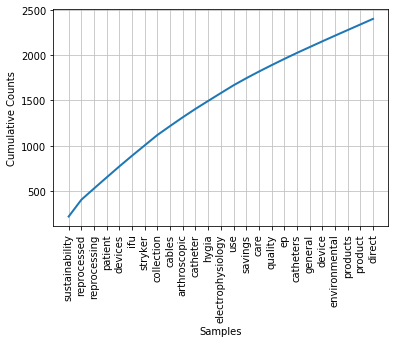

In [16]:
#doing frequncy plot for Stryker
s2words=FreqDist(mystext)
s2words.plot(25, cumulative=True)

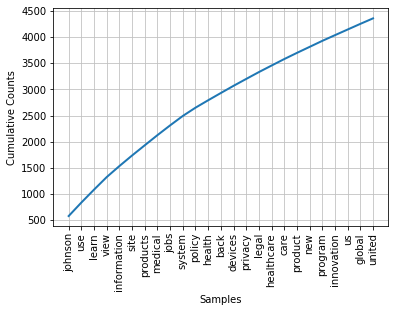

In [17]:
#doing frequncy plot for Sterile Medical
j2words=FreqDist(myjtext)
j2words.plot(25, cumulative=True)

To feel out this dataset I picked some key sales terms Stryker uses and compared it to Sterile Medical

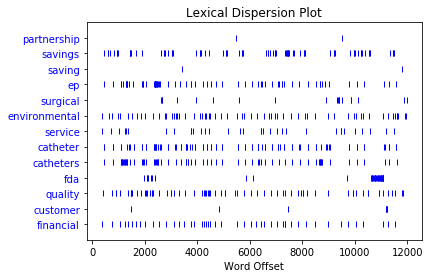

In [18]:
words=[ "partnership","savings","saving","ep","surgical","environmental","service",
       "catheter","catheters", "fda","quality","customer","financial"]

mystext.dispersion_plot(words)

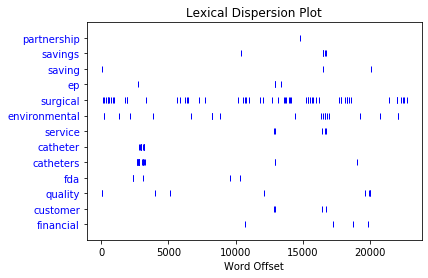

In [19]:
words=[ "partnership","savings","saving","ep","surgical","environmental","service",
       "catheter","catheters", "fda","quality","customer","financial"]

myjtext.dispersion_plot(words)

Looks like there is a huge difference in the use of words ep, surgical,financial, service, savings I am going to
run some more tests

Starting with financial and savings.  If my hypothesis is right these words will be assciated with Johnson and Johnson for sterile med and Stryker's program for stryker.

In [20]:
term_f='financial'
scounter[term_f]

48

In [21]:
jcounter[term_f]

4

In [22]:
mystext.similar('financial')

environmental stryker copyright


In [23]:
myjtext.similar('financial')

executive medical communication scientific


In [24]:
mystext.common_contexts(["financial","environmental"])

together_sustainability learn_sustainability


In [25]:
myjtext.common_contexts(["financial","environmental"])

No common contexts were found


In [26]:
myjtext.common_contexts(["financial","johnson"])

No common contexts were found


In [27]:
mystext.concordance("financial")

Displaying 25 of 48 matches:
rivacy policy home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
ce designed promote sustainability financial value ep service provides supply c
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
nce patient care initiatives learn financial sustainability many hospitals redu
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
te thank send home better together financial sustainability patient care sustai
te thank se

In [28]:
myjtext.concordance("financial")

Displaying 4 of 4 matches:
in years patient may also eligible financial assistance surgical costs covered 
r joseph wolk executive vice chief financial officer alex gorsky board director
rce significant patient discomfort financial acclarent products address learn t
 decisions consumer read statement financial conflicts interest policy policy i


In [29]:
term= "surgical"
scounter[term]



19

In [30]:
term= "surgical"
jcounter[term]


59

In [31]:
mystext.similar(term)

laparoscopic


In [32]:
myjtext.similar(term)

important fracture


In [33]:
mystext.concordance(term)

Displaying 19 of 19 matches:
lection savings direct product use surgical drill blades burs specially design
ill blades burs specially designed surgical accessories help surgeon cut drill
ms surgery reprocessing inspection surgical accessories logged upon receipt in
patient positioners primarily used surgical procedures support position positi
 arthroscopic wands radiofrequency surgical tools designed removal dissection 
ect study compares defect reported surgical original equipment manufacturer bi
els originally manufactured cooper surgical suture passers cedu product use re
ocar seal lubricated ensure smooth surgical instrument exchange stopcocks test
ernal fixation devices reprocessed surgical accessories reprocessed suture pas
relations patients contact medical surgical equipment orthopaedics neurotechno
ascular sage spine sports medicine surgical sustainability solutions trauma ex
 transport chairs support surfaces surgical suction surgical visualization tem
 support surfaces surgi

In [34]:
myjtext.concordance(term)

Displaying 25 of 59 matches:
 focus maximize value reprocessing surgical center healthcare provider rather 
s shining light practices days ago surgical centers see lot never cut regulate
us surgeries spine sports medicine surgical stapling trauma uterine pelvic vas
mprise biologically based products surgical conditions often difficult expensi
edicine power tools shoulder spine surgical stapling trauma uterine pelvic vas
tion tf acetabular revision system surgical automated system pinnacle acetabul
us surgeries spine sports medicine surgical stapling trauma uterine pelvic vas
mprise biologically based products surgical conditions often difficult expensi
edicine power tools shoulder spine surgical stapling trauma uterine pelvic vas
us surgeries spine sports medicine surgical stapling trauma uterine pelvic vas
mprise biologically based products surgical conditions often difficult expensi
edicine power tools shoulder spine surgical stapling trauma uterine pelvic vas
us surgeries spine spor

In [35]:
term1="ep"
scounter[term1]

69

In [36]:
jcounter[term1]

5

In [37]:
mystext.similar(term1)

electrophysiology ultrasound ablation care tourniquet general leads
oximeter introducer echocardiography original connector ice


In [38]:
myjtext.similar(term1)

In [39]:
mystext.concordance(term1)

Displaying 25 of 69 matches:
nt positioners pulse oximeter sensors ep lab catheter introducer sheaths intra
nt positioners pulse oximeter sensors ep lab catheter introducer sheaths intra
nt positioners pulse oximeter sensors ep lab catheter introducer sheaths intra
 electrophysiology catheters includes ep catheters originally manufactured bar
reprocessing decontamination accepted ep catheters undergo prolonged cleaning 
romote sustainability financial value ep service provides supply cost reductio
ycling select catheters removal waste ep labs eligible program precious metals
 collection bin specs ifu reprocessed ep catheter ifus brochures platinum plus
chures platinum plus program brochure ep cables sales sheet confidently outsou
s sheet confidently outsourcing risks ep catheters sales sheet lasso nav eco c
nt positioners pulse oximeter sensors ep lab catheter introducer sheaths intra
nt positioners pulse oximeter sensors ep lab catheter introducer sheaths intra
nt positioners pulse ox

In [40]:
myjtext.concordance(term1)

Displaying 5 of 5 matches:
lation resources patients collaborate ep clinical resources reimbursement tran
old biopsy forceps hot biopsy forceps ep lab ep diagnostic catheters ep cables
psy forceps hot biopsy forceps ep lab ep diagnostic catheters ep cables ultras
orceps ep lab ep diagnostic catheters ep cables ultrasound catheters steerable
 electrophysiology nov nov emea young ep academy germany joint arthroplasty no


In [41]:
term2="patient"
scounter[term2]

123

In [42]:
jcounter[term2]

26

In [43]:
mystext.similar(term2)

possible


In [44]:
myjtext.similar(term2)

In [45]:
mystext.concordance(term2)

Displaying 25 of 123 matches:
r together financial sustainability patient care sustainability environmental s
ables fall alarms air transfer mats patient positioners pulse oximeter sensors 
r together financial sustainability patient care sustainability environmental s
ables fall alarms air transfer mats patient positioners pulse oximeter sensors 
od clot may used hospital including patient care specialty areas surgery reproc
t compression sleeve ifus brochures patient care brochure savings sirect brochu
r together financial sustainability patient care sustainability environmental s
ables fall alarms air transfer mats patient positioners pulse oximeter sensors 
r together financial sustainability patient care sustainability environmental s
ables fall alarms air transfer mats patient positioners pulse oximeter sensors 
fu stryker hygia amdr legal contact patient care opportunities redirecting savi
unities redirecting savings matters patient care sustainability cedu customers 
lized savi

In [46]:
myjtext.concordance(term2)

Displaying 25 of 26 matches:
sible healthcare providers maintain patient care quality saving substantial amo
onsisting members commercial single patient use device reprocessing remanufactu
iders increase reduce costs improve patient protects interests members legislat
eter atrial fibrillation read first patient treated biosense webster ide study 
ation read webster life legacy read patient enrollment completed ide study ther
ation read biosense announces first patient treated study radiofrequency balloo
ools resources including cases care patient education materials help optimize c
triple aim goals improved increased patient reduced rib despite measurable clin
n sign one chest wall courses learn patient selection get experience fixation u
ocessing devices paramount ensuring patient since cleaning sterilization instru
d opportunity work together advance patient working deliver innovative solution
tions healthcare challenges advance patient care deliver clinical economic valu
vating stan

In [47]:
term3="partnership"
scounter[term3]


2

In [48]:
jcounter[term3]

1

In [49]:
mystext.concordance(term3)

Displaying 2 of 2 matches:
ober proud continue tree planting partnership stryker sustainability solutions 
nored named among best workplaces partnership great place learn collaboration e


In [50]:
myjtext.concordance(term3)

Displaying 1 of 1 matches:
 address public health challenges partnership chinese created hospital training


In [51]:
term4="johnson"
jcounter[term4]

580

In [52]:
myjtext.similar(term4)

family contact innovation combating part operating us medical one
october read products careers corporate business conduct statements
privacy serve rights


In [53]:
myjtext.concordance(term4)

Displaying 25 of 580 matches:
rocurement social impact contact us johnson johnson janssen pharmaceutical comp
nt social impact contact us johnson johnson janssen pharmaceutical companies jo
on janssen pharmaceutical companies johnson johnson johnson johnson innovation 
en pharmaceutical companies johnson johnson johnson johnson innovation advancin
aceutical companies johnson johnson johnson johnson innovation advancing new he
l companies johnson johnson johnson johnson innovation advancing new healthcare
 healthcare solutions collaboration johnson johnson medical devices companies r
are solutions collaboration johnson johnson medical devices companies reimagini
ety care commitment safety priority johnson johnson story learn rich heritage d
 commitment safety priority johnson johnson story learn rich heritage digital m
 current information made available johnson johnson contact us questions search
 information made available johnson johnson contact us questions search site ee
 gina supp

In [54]:
term13="environmental"
scounter[term13]

63

In [55]:
jcounter[term13]

22

In [56]:
myjtext.concordance(term13)

Displaying 22 of 22 matches:
device technologies recent posts environmental health regulation reprocessing s
ison hanson october comes action environmental canadians among among first phas
pact global public health global environmental health citizenship sustainabilit
pact global public health global environmental health citizenship sustainabilit
pact global public health global environmental health citizenship sustainabilit
pact global public health global environmental health citizenship sustainabilit
hip recognized state prestigious environmental stewardship awarded warsaw facil
bership contributions continuous environmental improvements demonstration compl
vements demonstration compliance environmental depuy synthes companies faciliti
on johnson sustainability awards environmental global sites work toward highest
pact global public health global environmental health citizenship sustainabilit
pact global public health global environmental health citizenship sustainabilit
systems red

In [57]:
mystext.concordance(term13)

Displaying 25 of 63 matches:
lity patient care sustainability environmental sustainability products safety q
port efforts reduce supply costs environmental participating organizations driv
lity patient care sustainability environmental sustainability products safety q
port efforts reduce supply costs environmental participating organizations driv
lity patient care sustainability environmental sustainability products safety q
lity patient care sustainability environmental sustainability products safety q
lity patient care sustainability environmental sustainability products safety q
ompromising quality safety learn environmental sustainability reprocessing faci
lity patient care sustainability environmental sustainability products safety q
lity patient care sustainability environmental sustainability products safety q
lity patient care sustainability environmental sustainability products safety q
lity patient care sustainability environmental sustainability products safety q
port effort

I did another lexical diversity plots to visualize the word analysis, that I did in the previous cells.


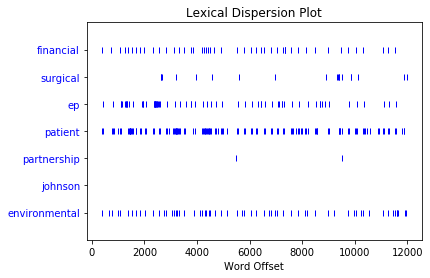

In [58]:
overview_words=['financial',"surgical","ep","patient","partnership","johnson","environmental"]
mystext.dispersion_plot(overview_words)

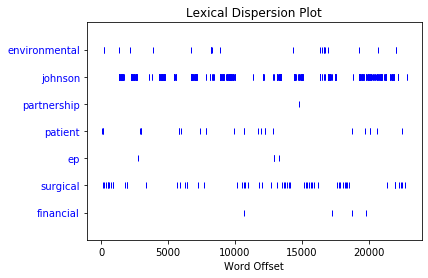

In [59]:
myjtext.dispersion_plot(overview_words)

I then decided to look at how both Stryker and Sterile Medical talked about their products and how frequently.

In [60]:
term5="oximeter"
scounter[term5]

54

In [61]:
jcounter[term5]

1

In [62]:
mystext.concordance(term5)

Displaying 25 of 54 matches:
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positioners pulse oximeter sensors ep lab catheter introducer
fer mats patient positi

In [63]:
term6="sleeve"
scounter[term6]

11

In [64]:
jcounter[term6]

0

In [65]:
mystext.concordance(term6)

Displaying 11 of 11 matches:
 original performance testing every sleeve inspected throughout various steps 
ecs ifu reprocessed dvt compression sleeve ifus brochures patient care brochur
ngs sirect brochure dvt compression sleeve sales sheet clinical papers reproce
 reprocessed hygia aircast venaflow sleeve reprocessed hygia ambu perfit ace c
uff reprocessed hygia ctc vasopress sleeve reprocessed hygia currie alp sleeve
sleeve reprocessed hygia currie alp sleeve reprocessed hygia ecg leads reproce
ot cuff reprocessed hygia huntleigh sleeve reprocessed hygia infusor bag repro
g reprocessed hygia kendall comfort sleeve reprocessed hygia kendall express f
processed hygia kendall express scd sleeve reprocessed hygia kendall impad rig
cover reprocessed hygia kendall scd sleeve reprocessed hygia masimo lncs adult
sed xcel universal trocar stability sleeve optiview technology copyright susta


In [66]:
term6="service"
scounter[term6]

34

In [67]:
jcounter[term6]

5

In [68]:
mystext.concordance(term6)

Displaying 25 of 34 matches:
nt legal duty furnish stryker terms service privacy policy home better together
es use applied following trademarks service trademarks trademarks respective ow
es use applied following trademarks service trademarks trademarks respective ow
 plus program platinum plus program service designed promote sustainability fin
e sustainability financial value ep service provides supply cost reductions rec
es use applied following trademarks service trademarks trademarks respective ow
es use applied following trademarks service trademarks trademarks respective ow
es use applied following trademarks service trademarks trademarks respective ow
 plus program platinum plus program service designed promote sustainability fin
e sustainability financial value ep service provides supply cost reductions rec
es use applied following trademarks service trademarks trademarks respective ow
es use applied following trademarks service trademarks trademarks respective ow
l sustainab

In [69]:
myjtext.concordance(term6)

Displaying 5 of 5 matches:
 care systems also contact customer service multi departmental patient monitors
 care systems also contact customer service references decision resources repro
 care systems also contact customer service request information device collecti
ources education training dedicated service goes beyond reprocessing one person
 care systems also contact customer service case study careadvantage johnson jo


In [70]:
term7="collections"
scounter[term7]

15

In [71]:
jcounter[term7]

3

In [72]:
mystext.concordance(term7)

Displaying 15 of 15 matches:
 discarded nearby landfills learn collections sorting reprocessing inspection p
g inspection purchasing receiving collections devices collected hospital utiliz
tion collection efficiency ep lab collections customized fit containers methodi
odically designed ensure maximize collections regardless space size program bui
tion stryker containers also used collections surgery centers designated orthop
d collection containers also used collections surgery centers designated orthop
llection efficiency general floor collections customized fit containers methodi
odically designed ensure maximize collections regardless space size program bui
erilization collection efficiency collections customized fit containers designe
ntainers designed ensure maximize collections regardless space size program bui
dicated service sales team manage collections provide valuable case conduct bus
agement perform education analyze collections provide ongoing account managemen
d collectio

In [73]:
myjtext.concordance(term7)

Displaying 3 of 3 matches:
ervice request information device collections multiple bin collection multiple 
ers work staff decide optimal bin collections staff training also help importan
raining also help important piece collections training staff devices collect pl


In [74]:
term8="ligasure"
scounter[term8]

52

In [75]:
jcounter[term8]

0

In [76]:
mystext.concordance(term8)

Displaying 25 of 52 matches:
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic instruments ligasure pneumatic tourniquet cuffs scissor
pic wands laparoscopic 

In [77]:
term11="harmonic"
scounter[term11]

10

In [78]:
jcounter[term11]

0

In [79]:
mystext.similar(term8)

laparoscopic trocars order remanufactured trocar


In [80]:
term9="stapling"
scounter[term9]

0

In [81]:
jcounter[term9]

34

In [82]:
myjtext.concordance(term9)

Displaying 25 of 34 matches:
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ower tools shoulder spine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ower tools shoulder spine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ower tools shoulder spine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ower tools shoulder spine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medicine surgical stapling trauma uterine pelvic vascular acc
ies spine sports medici

In [83]:
term10="catheters"
scounter[term10]

67

In [84]:
jcounter[term10]

21

In [85]:
mystext.concordance(term10)

Displaying 25 of 67 matches:
ography catheter electrophysiology catheters electrophysiology cables resources
ography catheter electrophysiology catheters electrophysiology cables resources
ography catheter electrophysiology catheters electrophysiology cables resources
dr legal contact electrophysiology catheters includes ep catheters originally m
rophysiology catheters includes ep catheters originally manufactured bard biose
nic jude medical electrophysiology catheters cedu product use reprocessing coll
essing decontamination accepted ep catheters undergo prolonged cleaning rinsing
 tip protectors placed fixed curve catheters ensure radius curvature remains un
n units per device collection wipe catheters wet gauze remove excess loosely co
 place stryker provided collection catheters complex need packaged universal co
y cost reductions recycling select catheters removal waste ep labs eligible pro
t confidently outsourcing risks ep catheters sales sheet lasso nav eco catheter
atheters sa

In [86]:
myjtext.concordance(term10)

Displaying 21 of 21 matches:
 system carto software therapeutic catheters diagnostic catheters ultrasound ca
e therapeutic catheters diagnostic catheters ultrasound catheters accessories g
rs diagnostic catheters ultrasound catheters accessories generators cables acce
cess cartonet products therapeutic catheters diagnostic catheters ultrasound ca
s therapeutic catheters diagnostic catheters ultrasound catheters cables access
rs diagnostic catheters ultrasound catheters cables access physicians electroph
m carto software carto therapeutic catheters carto diagnostic catheters carto u
apeutic catheters carto diagnostic catheters carto ultrasound catheters carto a
gnostic catheters carto ultrasound catheters carto accessories carto generators
 carto access cartonet therapeutic catheters diagnostic catheters ultrasound ca
t therapeutic catheters diagnostic catheters ultrasound catheters cables access
rs diagnostic catheters ultrasound catheters cables access search find solution
tion advame

In [87]:
term12="cables"
scounter[term12]

99

In [88]:
jcounter[term12]

6

In [89]:
mystext.concordance(term12)

Displaying 25 of 99 matches:
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters electrophysiology cables resources press ifu stryker hygia a
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters electrophysiology cables resources press ifu stryker hygia a
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters electrophysiology cables resources press ifu stryker hygia a
s platinum plus program brochure ep cables sales sheet confidently outsourcing
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters electrophysiology cables resources press ifu stryker hygia a
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters electrophysiology cables resources press ifu stryker hygia a
bosis compression sleeves ecg leads cables fall alarms air transfer mats patie
siology catheters elect

In [95]:
myjtext.concordance(term12)

Displaying 6 of 6 matches:
nd catheters accessories generators cables access cartonet products therapeuti
stic catheters ultrasound catheters cables access physicians electrophysiologi
 accessories carto generators carto cables carto access cartonet therapeutic c
stic catheters ultrasound catheters cables access search find solution electro
n sleeves pulse oximeter probes ekg cables lead wires operating room laparosco
s ep lab ep diagnostic catheters ep cables ultrasound catheters steerable intr


I built another lexical dispersion plot to display the produt terms I analyzed above.

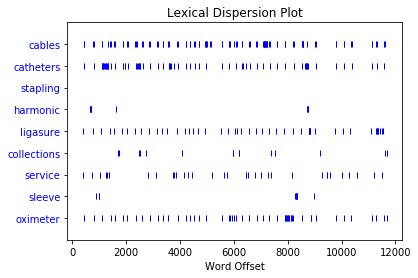

In [90]:
product_words=["cables","catheters","stapling","harmonic","ligasure","collections","service","sleeve","oximeter"]
mystext.dispersion_plot(product_words)

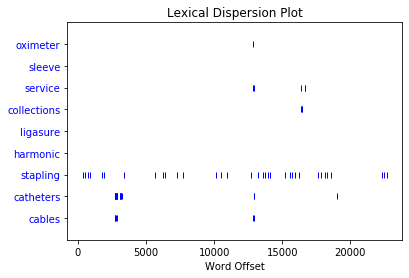

In [91]:
myjtext.dispersion_plot(product_words)

In [92]:
#finding unusual words in the stryker words list,  I couldn't make it work without a set?
# So now I am going to find the unusual words that Stryker uses that Johnson uses and do a dipersion plot showing them
    
regular_s= set(swords)
english_s=set(word.lower() for word in nltk.corpus.words.words())
unusual_s=regular_s- english_s


#sterile med
regular_j=set(jwords)
english_j=set(word.lower() for word in nltk.corpus.words.words())
unusual_j=regular_j- english_j
       

In [93]:
#Now I am making the list of unique words that Stryker uses and Sterile Med does not

unique=unusual_s-unusual_j
print(len(unique))

print(unique)


    



418


[('quantities', 1),
 ('officials', 1),
 ('ligasure', 1),
 ('fragments', 1),
 ('champions', 1),
 ('injuries', 1),
 ('logo', 1),
 ('circuitry', 1),
 ('hukill', 1),
 ('sonicated', 1),
 ('prevalon', 1),
 ('guidances', 1),
 ('ccs', 1),
 ('liters', 1),
 ('disposables', 1),
 ('foia', 1),
 ('clearnace', 1),
 ('completes', 1),
 ('separated', 1),
 ('scalpels', 1),
 ('burs', 1),
 ('polyol', 1),
 ('trees', 1),
 ('biologics', 1),
 ('echocardiography', 1),
 ('acunav', 1),
 ('parts', 1),
 ('rd', 1),
 ('passers', 1),
 ('heated', 1),
 ('mortenson', 1),
 ('inflates', 1),
 ('handles', 1),
 ('sections', 1),
 ('agilis', 1),
 ('impulses', 1),
 ('reductions', 1),
 ('bandwidth', 1),
 ('inprela', 1),
 ('simulates', 1),
 ('announcements', 1),
 ('viewers', 1),
 ('activated', 1),
 ('positioners', 1),
 ('stores', 1),
 ('extremities', 1),
 ('transmitted', 1),
 ('detergents', 1),
 ('inserts', 1),
 ('rx', 1)]